# Deploying the model

In [3]:
import cv2
import tensorflow as tf
import PIL
import numpy as np
import matplotlib.pyplot as plt

CATEGORIES = ['Healthy','Mild','Moderate','Severe']
model =tf.keras.models.load_model("acne_model")

def prepare(filepath):
    IMG_SIZE = 224
    image = PIL.Image.open(filepath)
    image_array = np.array(image)
    new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)



In [49]:
path = r"C:\Users\52551\Desktop\assignment acne severity classification\assignment acne severity classification\test images\image 12.jpg"
prediction = model.predict([prepare(path)])

1/1 [==============================] - 0s 269ms/step


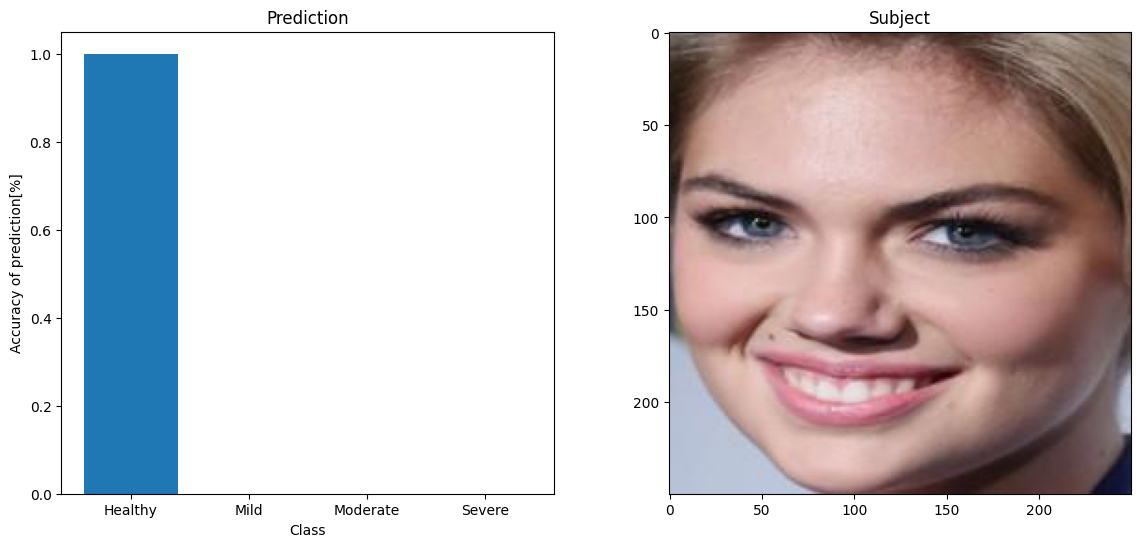

In [50]:
from pylab import rcParams

#rcParams['figure.figsize'] = 8,3
check_img = cv2.imread(path)
height = prediction[0]
bars = ('Healthy','Mild','Moderate','Severe')
y_pos = np.arange(len(bars))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(14, 6))
ax1.bar(y_pos, height)
ax1.set_xticks(y_pos, minor=False)
ax1.set_xticklabels(bars, fontdict=None, minor=False)
ax1.set_xlabel('Class')
ax1.set_ylabel('Accuracy of prediction[%]')
#ax1.xticks(y_pos, bars)
ax1.set_title('Prediction')
ax2.imshow(check_img[:, :, ::-1])
ax2.set_title('Subject')
plt.savefig(r'resultimages\image12_{}.png'.format(CATEGORIES[np.argmax(prediction)]))